<div class="alert alert-block alert-info">
<p style="font-size:24px;text-align:center"><b>Propagate a low-resolution hand-crafted laser pulse through a thin lens.</b>
<br>We initialize the laser pulse from the <b>Pump Off</b> experimental configuration.
</div>

In [1]:
import rslaser
import matplotlib.pyplot as plt
import numpy as np
from pykern.pkcollections import PKDict
from rslaser.optics import crystal
from rslaser.pulse import pulse
from rslaser.optics import drift
from rslaser.optics import lens
from pykern import pkio
import matplotlib as mpl
import srwlib
from srwlib import srwl
import uti_plot

In [2]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
data_dir = pkio.py_path(rslaser.pkg_resources.resource_filename('rslaser','package_data'))

LP = pulse.LaserPulse(
    PKDict(
        nslice=1,
        photon_e_ev=1.55,
    ), 
    files=PKDict(
        meta=str(data_dir.join('wfs_meta.dat')),
        ccd=str(data_dir.join('ccd_pump_off.txt')),
        wfs=str(data_dir.join('wfs_pump_off.txt')),
    )
)


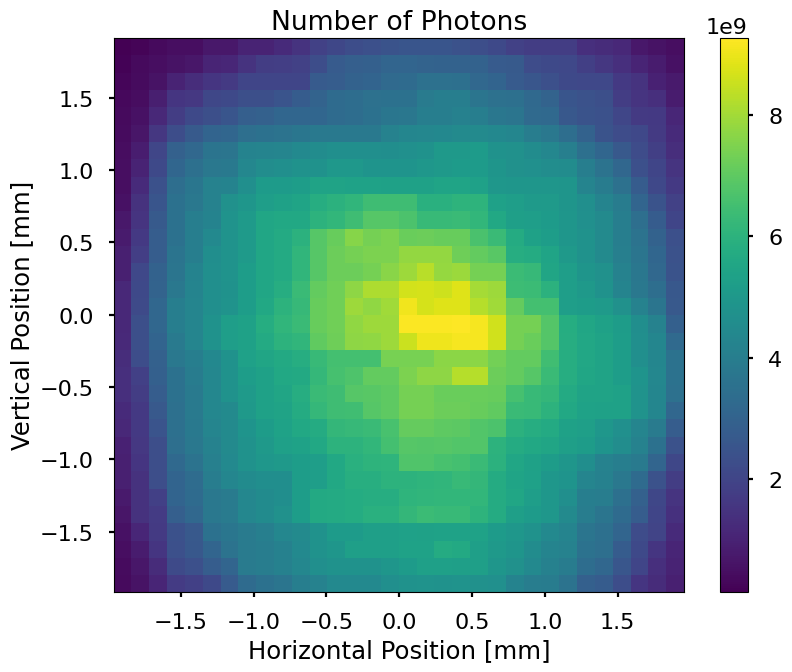

In [3]:
photonss0 = LP.slice[0].n_photons_2d
with plt.style.context(('seaborn-poster')):
    fig = plt.figure(figsize=(4.6 * 2,3.6 * 2))
    ax = fig.gca()
    plt.pcolormesh(photonss0.x*1e3, photonss0.y*1e3, np.reshape(photonss0.mesh, (LP.slice_wfr(0).mesh.ny, LP.slice_wfr(0).mesh.nx)), cmap=plt.cm.viridis, shading='auto')
    plt.colorbar()
    ax.set_ylabel(r'Vertical Position [mm]')
    ax.set_xlabel(r'Horizontal Position [mm]')
    ax.set_title('Number of Photons')

/home/vagrant/.pyenv/versions/py3/lib/python3.7/site-packages/uti_plot_matplotlib.py:414: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if isDataAr: ax.pcolormesh(x, y, ar2d, cmap=self._pl.cm.Greys_r) #OC30052020


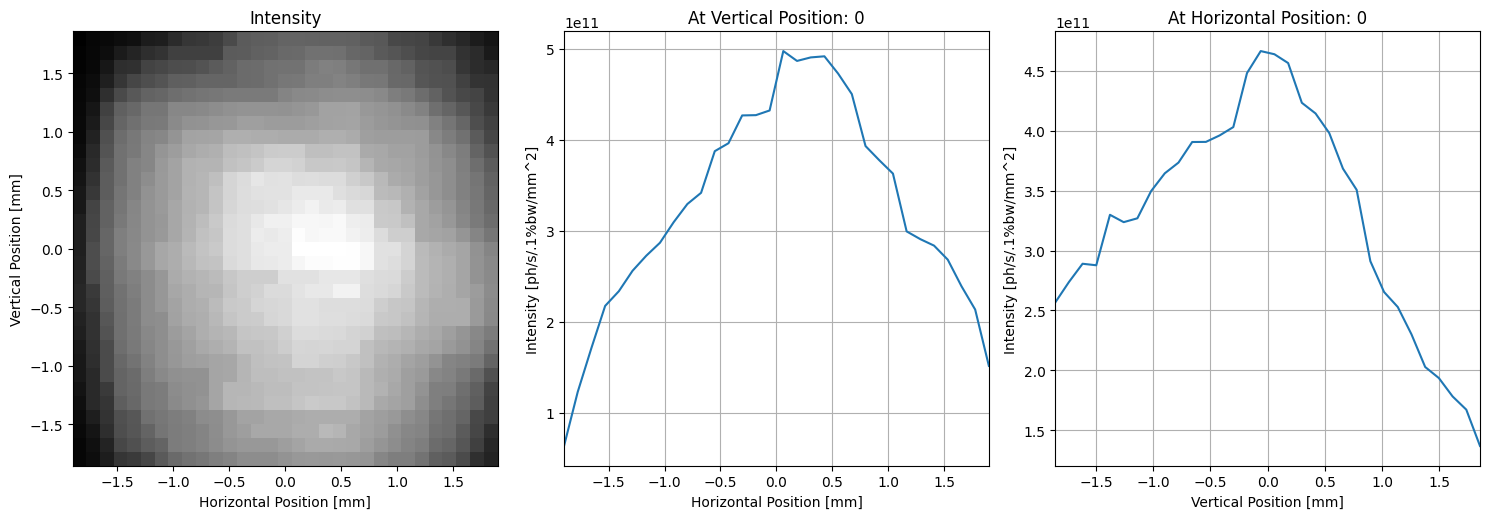

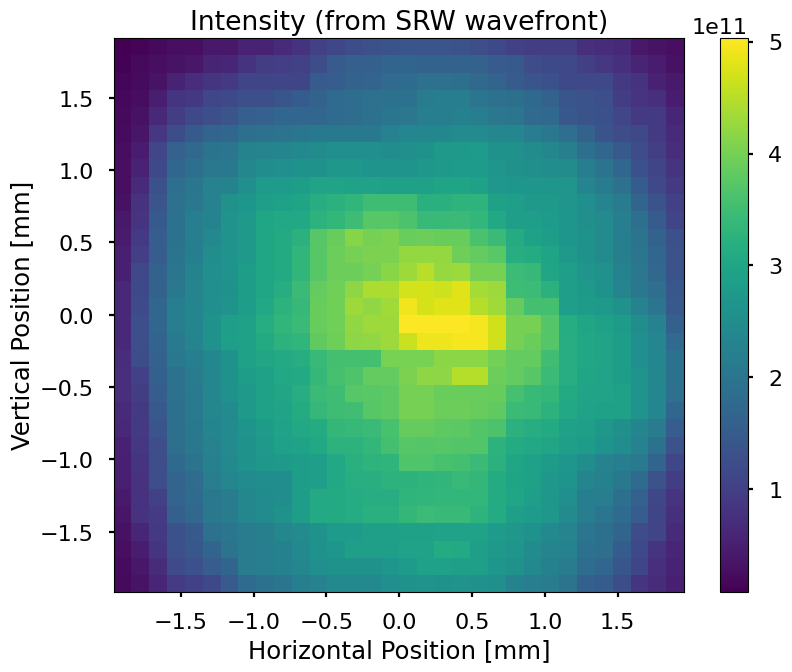

In [4]:
wfr0 = LP.slice_wfr(0)
intens0 = srwlib.array('f', [0]*wfr0.mesh.nx*wfr0.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intens0, wfr0, 6, 0, 3, wfr0.mesh.eStart, 0, 0) #extracts intensity

#srwlib.srwl_uti_save_intens_ascii(intens0, wfr0.mesh, 'initial-intensity.dat', 0, ['', 'Horizontal Position', 'Vertical Position', 'Intensity'], _arUnits=['', 'm', 'm', ''])
uti_plot.uti_plot2d1d(
    intens0,
    [wfr0.mesh.xStart, wfr0.mesh.xFin, wfr0.mesh.nx],
    [wfr0.mesh.yStart, wfr0.mesh.yFin, wfr0.mesh.ny],
    0,
    0,
    ['Horizontal Position', 'Vertical Position', 'Intensity'],
    ['m', 'm', 'ph/s/.1%bw/mm^2'],
    True)

##Reshaping electric field data from flat to 2D array
intens0_2d = np.array(intens0).reshape((wfr0.mesh.ny, wfr0.mesh.nx))

with plt.style.context(('seaborn-poster')):
    fig = plt.figure(figsize=(4.6 * 2,3.6 * 2))
    ax = fig.gca()
    plt.pcolormesh(photonss0.x*1e3, photonss0.y*1e3, intens0_2d, cmap=plt.cm.viridis, shading='auto')
    plt.colorbar()
    ax.set_ylabel(r'Vertical Position [mm]')
    ax.set_xlabel(r'Horizontal Position [mm]')
    ax.set_title('Intensity (from SRW wavefront)')

/home/vagrant/.pyenv/versions/py3/lib/python3.7/site-packages/uti_plot_matplotlib.py:414: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if isDataAr: ax.pcolormesh(x, y, ar2d, cmap=self._pl.cm.Greys_r) #OC30052020


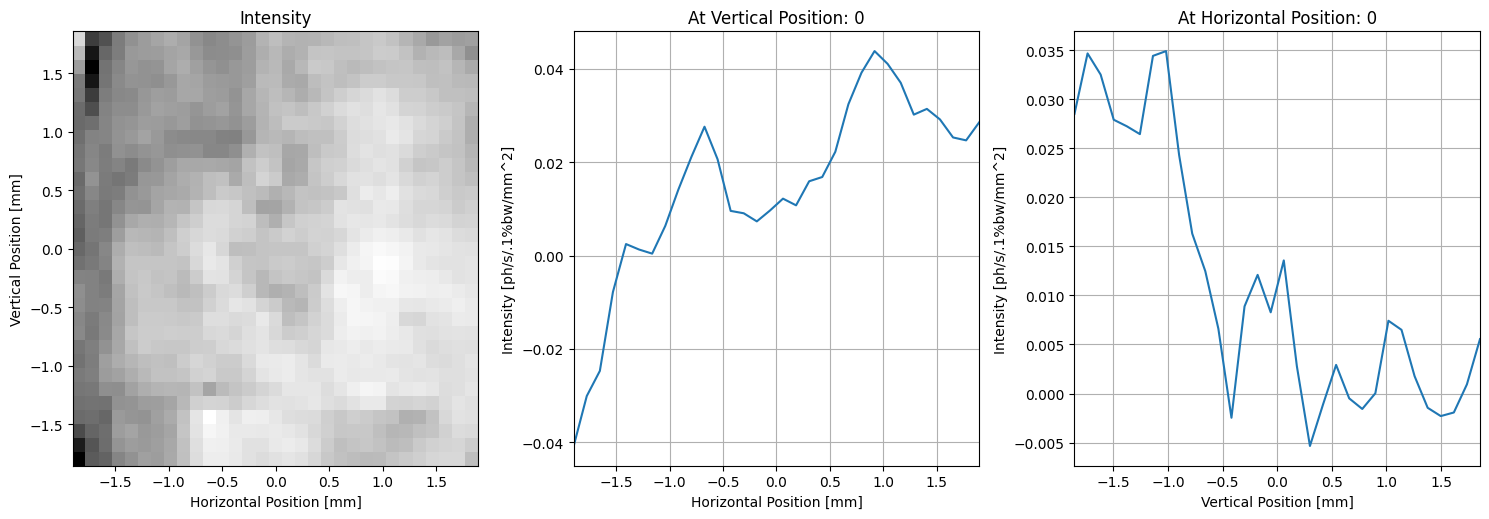

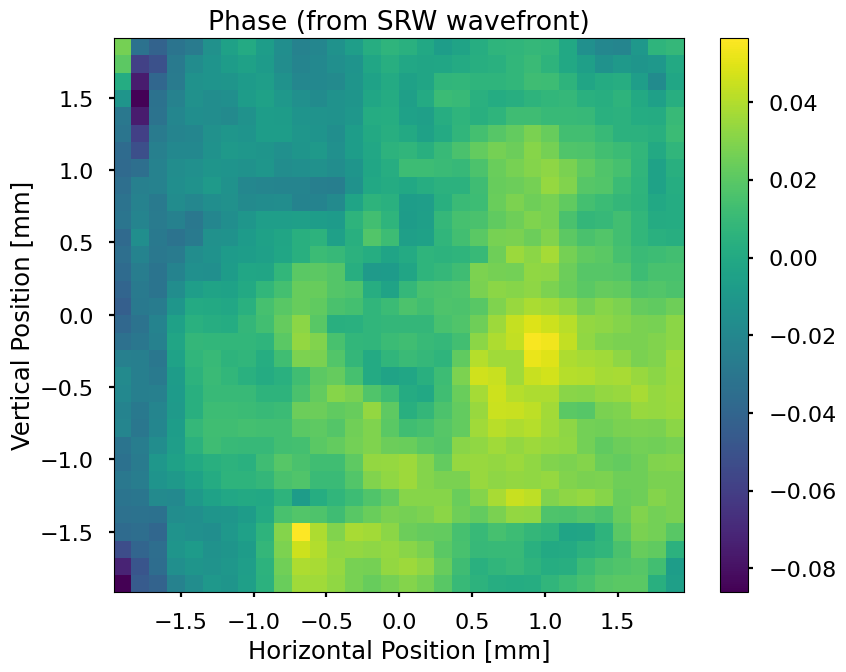

In [5]:
# initial phase
phase0 = srwlib.array('d', [0]*wfr0.mesh.nx*wfr0.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(phase0, wfr0, 0, 4, 3, wfr0.mesh.eStart, 0, 0) #extracts the phase; must use double precision

#srwlib.srwl_uti_save_intens_ascii(phase0, wfr0.mesh, 'initial-phase.dat', 0, ['', 'Horizontal Position', 'Vertical Position', 'Phase'], _arUnits=['', 'm', 'm', 'rad'])
uti_plot.uti_plot2d1d(
    phase0,
    [wfr0.mesh.xStart, wfr0.mesh.xFin, wfr0.mesh.nx],
    [wfr0.mesh.yStart, wfr0.mesh.yFin, wfr0.mesh.ny],
    0,
    0,
    ['Horizontal Position', 'Vertical Position', 'Intensity'],
    ['m', 'm', 'ph/s/.1%bw/mm^2'],
    True)

##Reshaping electric field data from flat to 2D array
phase0_2d = np.array(phase0).reshape((wfr0.mesh.ny, wfr0.mesh.nx))

# plot the phase
with plt.style.context(('seaborn-poster')):
    fig = plt.figure(figsize=(4.6 * 2,3.6 * 2))
    ax = fig.gca()
    plt.pcolormesh(photonss0.x*1e3, photonss0.y*1e3, phase0_2d, cmap=plt.cm.viridis, shading='auto')
    plt.colorbar()
    ax.set_xlabel(r'Horizontal Position [mm]')
    ax.set_ylabel(r'Vertical Position [mm]')
    ax.set_title('Phase (from SRW wavefront)')

In [6]:
LP.rmsvals()

([0.00098359311769258], [0.0009256992327342814])

<div class="alert alert-block alert-info">
<p style="font-size:18px;">Propagate the laser pulse through a Ti:Sapphire crystal and 50 cm drift.</p>
</div>

In [7]:
# instantiate the crystal with laser pumping on
L_crystal = 0.01   # [m]
num_slices = 1

crystal_params = PKDict(
        n0 = [1.76 for _ in range(num_slices)],
        n2 = [4.0  for _ in range(num_slices)],
        length = L_crystal,
        nslice = num_slices,
#        l_scale = 0.001,    # uncomment when using LCT-based propagators
)
e_crystal = crystal.Crystal(crystal_params)

# instantiate a simple focusing lens
focal_length = 2.   # [m]
e_lens = lens.Lens(focal_length)

# instantiate a drift
L_drift = 0.50  # [m]
e_drift = drift.Drift(L_drift)

lattice = [(e_lens,'default'), 
#           (e_crystal,'abcd_lct'), #'abcd'), 
           (e_crystal,'n0n2_srw'), #'abcd'), 
           (e_lens,'default'), 
           (e_drift,'default')
          ]

In [8]:
# propagate the pulse through the lattice
LP_final = LP
for iterator in lattice:
    current_elem, prop_type = iterator
    LP_final = current_elem.propagate(LP_final, prop_type)

<div class="alert alert-block alert-info">
<p style="font-size:18px;">Plot the laser pulse after propagating through the crystal and drift.</p>
</div>

/home/vagrant/.pyenv/versions/py3/lib/python3.7/site-packages/uti_plot_matplotlib.py:414: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if isDataAr: ax.pcolormesh(x, y, ar2d, cmap=self._pl.cm.Greys_r) #OC30052020


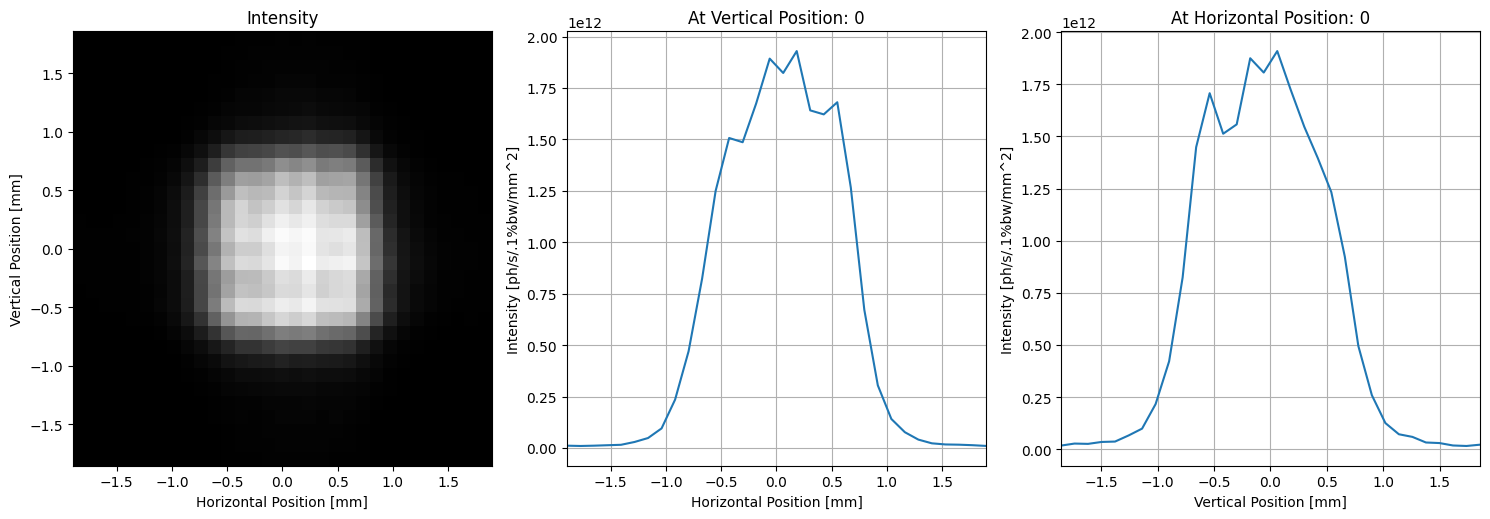

In [9]:
# transmitted pulse - intensity
wfr2=LP_final.slice_wfr(0)

x1 = np.linspace(wfr2.mesh.xStart,wfr2.mesh.xFin,wfr2.mesh.nx)
y1 = np.linspace(wfr2.mesh.yStart,wfr2.mesh.yFin,wfr2.mesh.ny)
x, y = np.meshgrid(x1, y1)

intens2 = srwlib.array('f', [0]*wfr2.mesh.nx*wfr2.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intens2, wfr2, 0, 0, 3, wfr2.mesh.eStart, 0, 0) #extracts intensity

#srwlib.srwl_uti_save_intens_ascii(intens2, wfr2.mesh, 'final-intensity.dat', 0, ['', 'Horizontal Position', 'Vertical Position', 'Intensity'], _arUnits=['', 'm', 'm', ''])
uti_plot.uti_plot2d1d(
    intens2,
    [wfr2.mesh.xStart, wfr2.mesh.xFin, wfr2.mesh.nx],
    [wfr2.mesh.yStart, wfr2.mesh.yFin, wfr2.mesh.ny],
    0,
    0,
    ['Horizontal Position', 'Vertical Position', 'Intensity'],
    ['m', 'm', 'ph/s/.1%bw/mm^2'],
    True)

##Reshaping electric field data from flat to 2D array
intens2_2d = np.array(intens2).reshape((wfr2.mesh.ny, wfr2.mesh.nx))


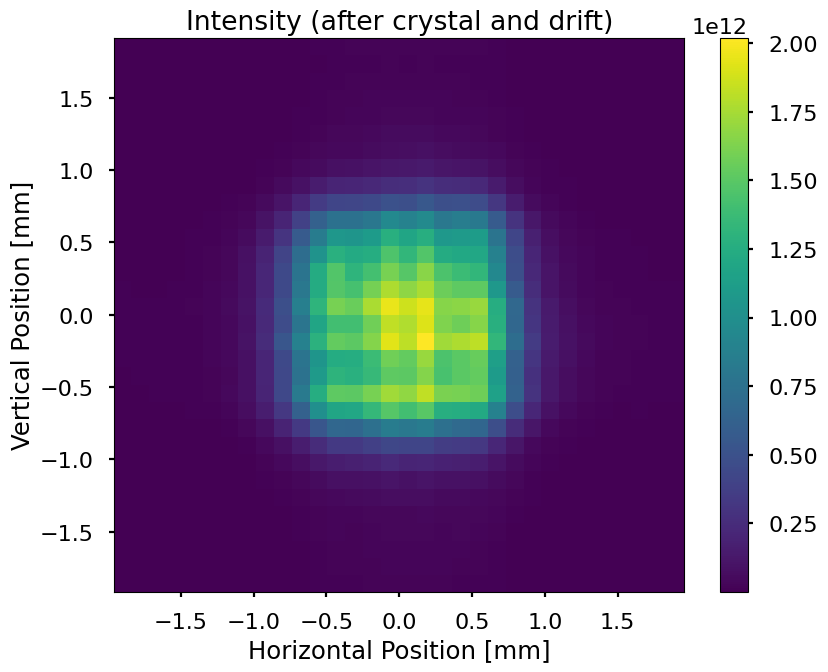

In [10]:
# plot the computed intensity
with plt.style.context(('seaborn-poster')):
    fig = plt.figure(figsize=(4.6 * 2,3.6 * 2))
    ax = fig.gca()
    # By setting wfr0a.unitElFldAng=1, default units should  now be in mrad(?)
    plt.pcolormesh(x1*1e3, y1*1e3, intens2_2d, cmap=plt.cm.viridis,shading='auto')
    plt.colorbar()
    ax.set_ylabel(r'Vertical Position [mm]')
    ax.set_xlabel(r'Horizontal Position [mm]')
    ax.set_title('Intensity (after crystal and drift)')

/home/vagrant/.pyenv/versions/py3/lib/python3.7/site-packages/uti_plot_matplotlib.py:414: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if isDataAr: ax.pcolormesh(x, y, ar2d, cmap=self._pl.cm.Greys_r) #OC30052020


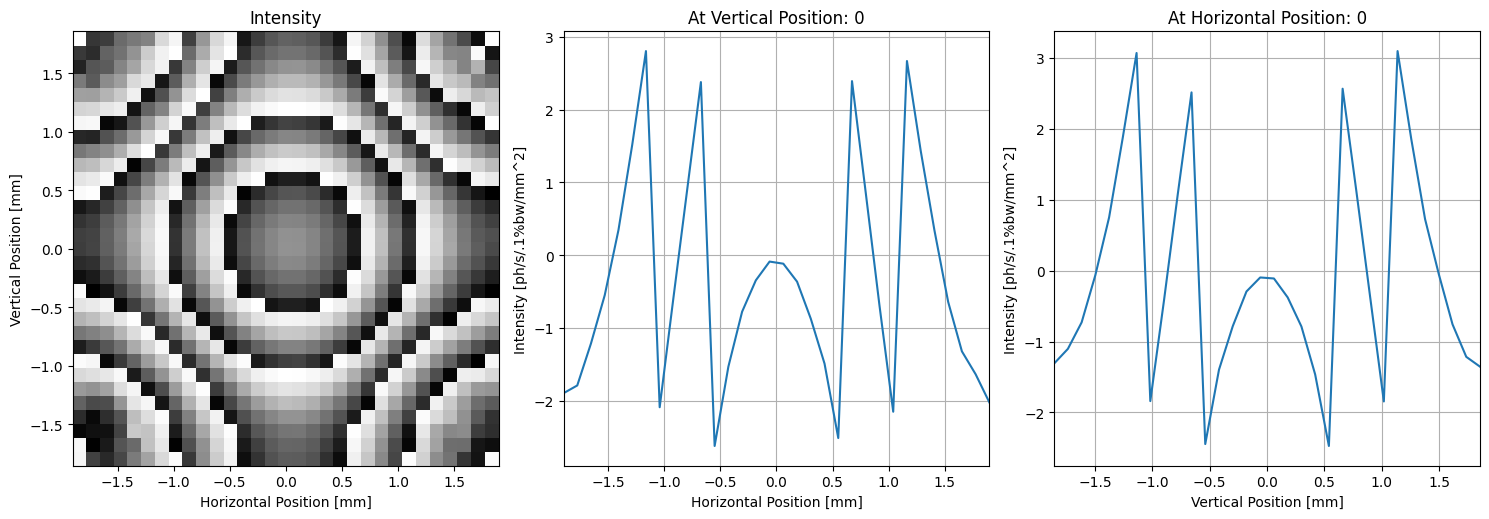

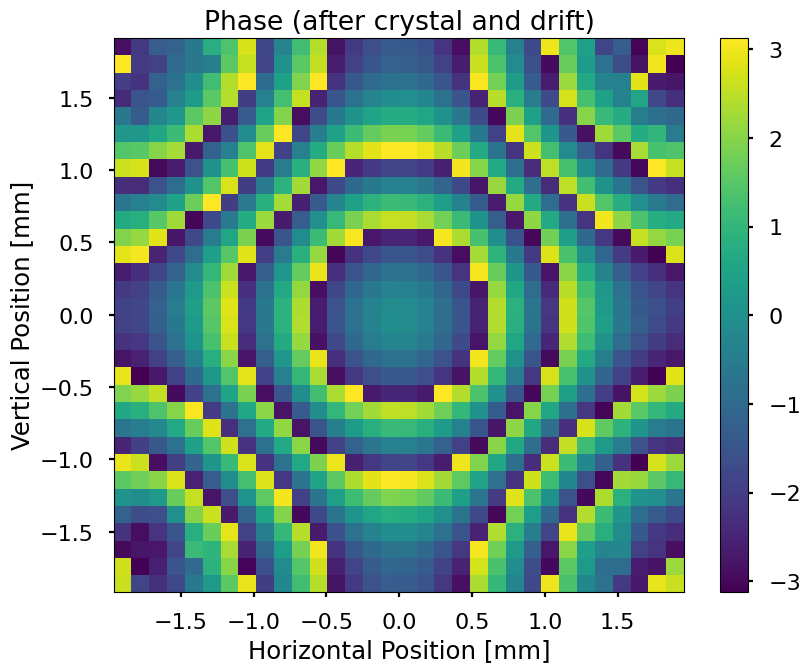

In [11]:
# transmitted pulse - phase
phase2 = srwlib.array('d', [0]*wfr2.mesh.nx*wfr2.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(phase2, wfr2, 0, 4, 3, wfr2.mesh.eStart, 0, 0) #extracts the phase; must use double precision

#srwlib.srwl_uti_save_intens_ascii(phase2, wfr2.mesh, 'final-phase.dat', 0, ['', 'Horizontal Position', 'Vertical Position', 'Phase'], _arUnits=['', 'm', 'm', 'rad'])
uti_plot.uti_plot2d1d(
    phase2,
    [wfr2.mesh.xStart, wfr2.mesh.xFin, wfr2.mesh.nx],
    [wfr2.mesh.yStart, wfr2.mesh.yFin, wfr2.mesh.ny],
    0,
    0,
    ['Horizontal Position', 'Vertical Position', 'Intensity'],
    ['m', 'm', 'ph/s/.1%bw/mm^2'],
    True)

##Reshaping electric field data from flat to 2D array
phase2_2d = np.array(phase2).reshape((wfr2.mesh.ny, wfr2.mesh.nx))

with plt.style.context(('seaborn-poster')):
    fig = plt.figure(figsize=(4.6 * 2,3.6 * 2))
    ax = fig.gca()

    # By setting wfr0a.unitElFldAng=1, default units should  now be in mrad(?)
#    plt.pcolormesh(x*1e3, y*1e3, np.unwrap(phase2_2d), cmap=plt.cm.viridis,shading='auto')
    plt.pcolormesh(x*1e3, y*1e3, phase2_2d, cmap=plt.cm.viridis,shading='auto')
    plt.colorbar()
    ax.set_ylabel(r'Vertical Position [mm]')
    ax.set_xlabel(r'Horizontal Position [mm]')
    ax.set_title('Phase (after crystal and drift)')

In [12]:
LP.rmsvals()

([0.0005065286145559112], [0.00046596422368980705])